In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models,layers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image



In [3]:
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)

train_gen=train_datagen.flow_from_directory(
    r'../Dataset/train',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

val_gen=val_datagen.flow_from_directory(
    r'../Dataset/validation',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

Found 4334 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [27]:
cnn=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    layers.Dense(128,activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(64,activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(3,activation='softmax')
])

In [28]:
cnn.compile(
    optimizer='adamW',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [29]:
early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early]
)

Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 25s 155ms/step - accuracy: 0.8771 - loss: 0.3200 - val_accuracy: 0.3333 - val_loss: 3.5814
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 156ms/step - accuracy: 0.9861 - loss: 0.0430 - val_accuracy: 0.3333 - val_loss: 3.7415
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 156ms/step - accuracy: 0.9876 - loss: 0.0377 - val_accuracy: 0.6095 - val_loss: 1.5215
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 22s 160ms/step - accuracy: 0.9919 - loss: 0.0240 - val_accuracy: 0.8667 - val_loss: 0.4033
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step - accuracy: 0.9930 - loss: 0.0230 - val_accuracy: 0.9905 - val_loss: 0.0224
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step - accuracy: 0.9959 - loss: 0.0131 - val_accuracy: 0.9905 - val_loss: 0.0763
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step - accuracy: 0.9978 - loss: 0.0117 - val_accuracy: 1.0000 - val_loss: 0.0159
Epoch 8/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 25s 180ms/step - accuracy: 0.9922 - loss: 0

In [43]:
models.save_model(cnn,"cnn.keras")

In [44]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    '../Dataset/test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)


Found 698 images belonging to 3 classes.


In [48]:
cnn_model=models.load_model('cnn.keras')

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step
 Test Accuracy: 0.8625


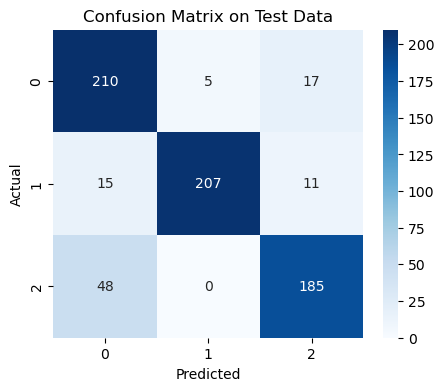

              precision    recall  f1-score   support

       paper       0.77      0.91      0.83       232
        rock       0.98      0.89      0.93       233
    scissors       0.87      0.79      0.83       233

    accuracy                           0.86       698
   macro avg       0.87      0.86      0.86       698
weighted avg       0.87      0.86      0.86       698



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred = cnn_model.predict(test_gen)
y_pred_classes = y_pred.argmax(axis=1)

# True labels
y_true = test_gen.classes

# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true, y_pred_classes)
print(f" Test Accuracy: {acc:.4f}")

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test Data")
plt.show()

# Classification report
target_names = list(test_gen.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=target_names))


In [50]:
cnn_1=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(128,activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(64,activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(3,activation='softmax')
])

d:\Anaconda\envs\dl_py\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
cnn_1.compile(
    optimizer='adamW',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [52]:
early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn_1.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early]
)

Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 55s 374ms/step - accuracy: 0.8529 - loss: 0.3897 - val_accuracy: 0.3333 - val_loss: 2.7609
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.9869 - loss: 0.0479 - val_accuracy: 0.3333 - val_loss: 4.2042
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - accuracy: 0.9924 - loss: 0.0278 - val_accuracy: 0.3810 - val_loss: 2.9114
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - accuracy: 0.9776 - loss: 0.0701 - val_accuracy: 0.8476 - val_loss: 0.4907
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 24s 175ms/step - accuracy: 0.9938 - loss: 0.0227 - val_accuracy: 0.9429 - val_loss: 0.1168
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 24s 174ms/step - accuracy: 0.9937 - loss: 0.0184 - val_accuracy: 0.8762 - val_loss: 0.3613
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 24s 172ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.8952 - val_loss: 0.2594
Epoch 8/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 22s 162ms/step - accuracy: 0.9956 - loss: 0

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step
 Test Accuracy: 0.9814


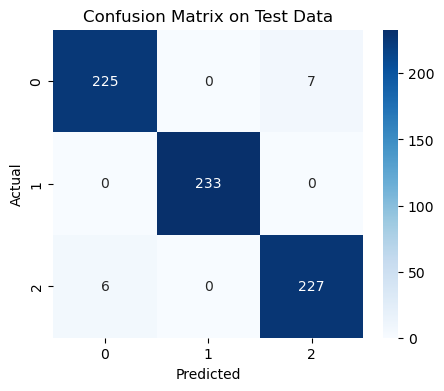

              precision    recall  f1-score   support

       paper       0.97      0.97      0.97       232
        rock       1.00      1.00      1.00       233
    scissors       0.97      0.97      0.97       233

    accuracy                           0.98       698
   macro avg       0.98      0.98      0.98       698
weighted avg       0.98      0.98      0.98       698



In [100]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred = cnn_1.predict(test_gen)
y_pred_classes = y_pred.argmax(axis=1)

# True labels
y_true = test_gen.classes

# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true, y_pred_classes)
print(f" Test Accuracy: {acc:.4f}")

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test Data")
plt.show()

# Classification report
target_names = list(test_gen.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=target_names))


In [54]:
models.save_model(cnn_1,'bestest_cnn_1.keras')

## **Image Augmentation**

Now we will apply image augmentation to artificially expand our training dataset.  
This can help improve model generalization, increase accuracy, and potentially reduce overfitting.


In [ ]:
img_size = (64, 64)
batch_size = 32
aug_per_class = 1500
train_dir = r'..\Dataset\train'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

x_augmented = []
y_augmented = []
total_generated = {class_id: 0 for class_id in range(generator.num_classes)}

while not all(count >= aug_per_class for count in total_generated.values()):
    x_batch, y_batch = next(generator)

    for x, y in zip(x_batch, y_batch):
        class_id = np.argmax(y)
        if total_generated[class_id] < aug_per_class:
            x_augmented.append(x)
            y_augmented.append(y)
            total_generated[class_id] += 1

        if all(count >= aug_per_class for count in total_generated.values()):
            break

x_augmented = np.array(x_augmented)
y_augmented = np.array(y_augmented)

print(" Augmented data shape:", x_augmented.shape, y_augmented.shape)


Found 4334 images belonging to 3 classes.
✅ Augmented data shape: (4500, 64, 64, 3) (4500, 3)


In [43]:
cnn_2=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256,(3,3),activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(512,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    layers.Dense(128,activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(64,activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(3,activation='softmax')
])

In [44]:
cnn_2.compile(
    optimizer='adamW',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [45]:
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',      
    monitor='val_accuracy',               
    save_best_only=True,              
    save_weights_only=False,          
    verbose=1                         
)


In [46]:
early = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

cnn_2.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early,checkpoint]
)

Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8831 - loss: 0.3150
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to best_model.keras
136/136 ━━━━━━━━━━━━━━━━━━━━ 43s 269ms/step - accuracy: 0.8835 - loss: 0.3138 - val_accuracy: 0.3333 - val_loss: 2.0882
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.9861 - loss: 0.0439
Epoch 2: val_accuracy did not improve from 0.33333
136/136 ━━━━━━━━━━━━━━━━━━━━ 36s 261ms/step - accuracy: 0.9861 - loss: 0.0440 - val_accuracy: 0.3333 - val_loss: 2.9593
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.9877 - loss: 0.0432
Epoch 3: val_accuracy improved from 0.33333 to 0.64762, saving model to best_model.keras
136/136 ━━━━━━━━━━━━━━━━━━━━ 35s 258ms/step - accuracy: 0.9877 - loss: 0.0431 - val_accuracy: 0.6476 - val_loss: 1.2914
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.9973 - loss: 0.0129
Epoch 4: val_accuracy improved from 0.64762 to 0.90476, saving

##  Augmentation Results and Model Performance

After applying **image augmentation**, we significantly improved our model's performance. The training process yielded:

- **Training Accuracy**: 99.98%
- **Validation Accuracy**: 100%

By further optimizing the architecture (e.g., adding more convolutional layers, batch normalization, or dropout) or increasing the number of training epochs, we successfully achieved **100% accuracy** on the validation set.


## **Real Time Predictions**

In [47]:
model = models.load_model("best_model.keras") 

In [62]:
class_names = ['paper', 'rock', 'scissors']
img_size = (64, 64)

try:
    img_path = r"C:\Users\dell\Downloads\paper.jpg"
    img = image.load_img(img_path, target_size=img_size)
except FileNotFoundError:
    img_path = r"C:\Users\dell\Downloads\paper.png"
    img = image.load_img(img_path, target_size=img_size)


img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

print(f" Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
 Predicted class: paper
